In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import pylab as pl

In [23]:
sns.set(style="whitegrid", color_codes=True)

In [4]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
song_df = pd.read_csv("data/songs.csv")
song_extra_df = pd.read_csv("data/song_extra_info.csv")
sample_df = pd.read_csv("data/sample_submission.csv")
member_df = pd.read_csv("data/members.csv")

In [299]:
song_df = pd.read_csv("data/songs.csv")


In [5]:
train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [15]:
print "Taining data size: ", len(train_df)
print "No. of users: ", len(set(train_df["msno"]))
print "No. of songs: ", len(set(train_df["song_id"]))
print "No. of columns in taining data:", len(train_df.columns.values)

Taining data size:  7377418
No. of users:  30755
No. of songs:  359966
No. of columns in taining data: 6


In [118]:
print "columns in taining data:", train_df.columns.values

columns in taining data: ['msno' 'song_id' 'source_system_tab' 'source_screen_name' 'source_type'
 'target']


# Exploring Variables 


In [119]:
def get_numerical_value_stats(df, col):
    data = df[col].value_counts()
    print "Value | Pecentage | Count" 
    for index in range(len(data)):
        print str(data.index[index]) + "     |     " + str(data[index]*100/len(train_df)) +  "    |   " + str(data[index])

In [120]:
get_numerical_value_stats(train_df, "target")

Value | Pecentage | Count
1     |     49    |   3662762
0     |     50    |   3714656


In [278]:
def get_variable_stats(df, col):
    col_stats = df[col].value_counts().iloc[:10]
    print col_stats
    print "*"*40
    g = sns.countplot(x=col, data=df, palette="Greens_d", order=col_stats.index)
    sns.plt.show()  
    sns.plt.xticks(rotation=90)

my library      3684730
discover        2179252
search           623286
radio            476701
listen with      212266
explore          167949
null               6478
notification       6185
settings           2200
Name: source_system_tab, dtype: int64
****************************************


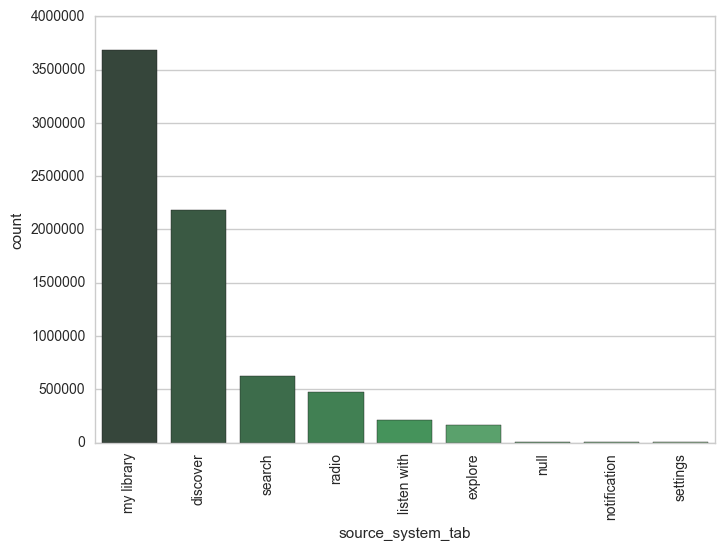

In [233]:
get_variable_stats(train_df, "source_system_tab")

Local playlist more     3228202
Online playlist more    1294689
Radio                    474467
Album more               420156
Search                   298487
Artist more              252429
Discover Feature         244246
Discover Chart           213658
Others profile more      201795
Discover Genre            82202
Name: source_screen_name, dtype: int64
****************************************


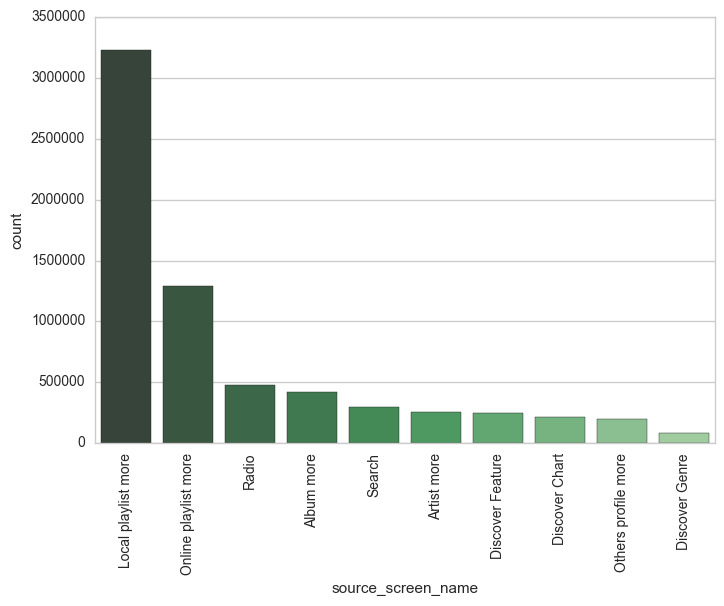

In [234]:
get_variable_stats(train_df, "source_screen_name")

local-library             2261399
online-playlist           1967924
local-playlist            1079503
radio                      483109
album                      477344
top-hits-for-artist        423614
song                       244722
song-based-playlist        210527
listen-with                192842
topic-article-playlist      11194
Name: source_type, dtype: int64
****************************************


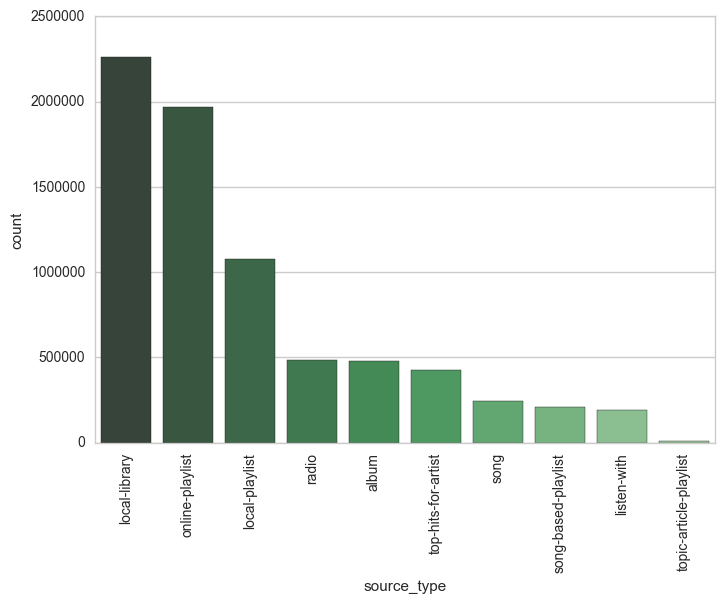

In [235]:
get_variable_stats(train_df, "source_type")

# Missing Value stats

In [297]:
def percantage_of_missing_values(data_len, missing_len):
    return missing_len*100.0/data_len

def get_missing_col_stats(df):
    missing_values = df.isnull().sum()
    missing_data = zip(missing_values.index, missing_values.values)
    data_len = len(df)
    print "missing_values count"
    print missing_values
    print "*"*40
    print "DataFrame length: ", data_len
    for data in missing_data:
        print "Missing value percantage: " + data[0] + " =>"+ str(percantage_of_missing_values(data_len, data[1]))

In [69]:
get_missing_col_stats(train_df)

missing_values count
msno                       0
song_id                    0
source_system_tab      18371
source_screen_name    414804
source_type            21539
target                     0
dtype: int64
****************************************
DataFrame length:  7377418
Missing value percantage: msno =>0.0
Missing value percantage: song_id =>0.0
Missing value percantage: source_system_tab =>0.249016661385
Missing value percantage: source_screen_name =>5.62261756078
Missing value percantage: source_type =>0.291958514483
Missing value percantage: target =>0.0


# Exploring song data

In [123]:
song_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [126]:
print "Songs Data Size: ", len(song_df)
print "No. of Songs: ", len(set(song_df["song_id"]))
print "No. of Columns in Songs data:", len(song_df.columns.values)

Songs Data Size:  2296320
No. of Songs:  2296320
No. of Columns in Songs data: 7


In [257]:
song_df["song_len_min"] = song_df["song_length"]/(60*1000.0)

In [300]:
get_missing_col_stats(song_df)

### Exploring numerical variable: Song

In [255]:
song_df.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


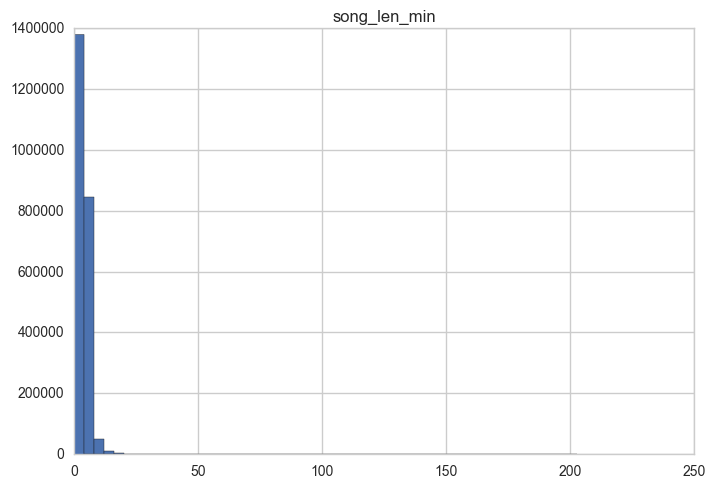

In [260]:
song_df.hist(column='song_len_min', bins=50)
plt.show()
# song_df.plot.kde(ax=song_df["song_length"])

In [261]:
def normal_plot(data_list):
    h = sorted(data_list)
    fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
    pl.plot(h, fit,'-o')
    pl.hist(h, normed=True)      #use this to draw histogram of your data
    pl.show() 

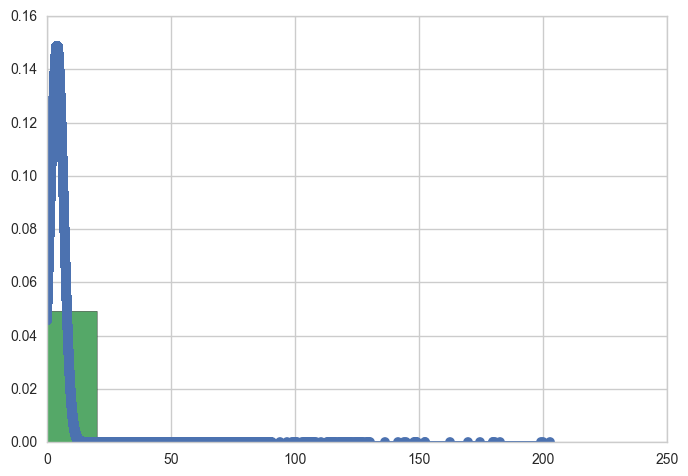

In [262]:
normal_plot(song_df["song_len_min"])

In [264]:
# normal_plot(song_df["language"])
# min(song_df["language"])
# max(song_df["language"])
# np.mean(song_df["language"])
# np.std(song_df["language"])

### Exploring Categorial Variables

In [265]:
def get_unique_category_num(category_list):
    cat_list = []
    for category in category_list:
        cat_list.append(category.split("|"))
    flattened_list = [val for sublist in cat_list for val in sublist]
    print "Sample: ", flattened_list[:5]
    return len(set(flattened_list))

#### filling na value

In [270]:
categorical_list = ["genre_ids", "artist_name", "composer", "lyricist"]

In [269]:
def fill_na(df, categorical_list):
    for col in categorical_list:
        df[col] = df[col].fillna("")

In [272]:
fill_na(song_df, categorical_list)

In [271]:
n = get_unique_category_num(song_df["genre_ids"])
print "No. of unique genre: ", n 

Sample:  ['465', '444', '465', '465', '726']
No. of unique genre:  192


In [224]:
a = get_unique_category_num(song_df["artist_name"])
print "No. of unique artists: ", a

Sample:  ['\xe5\xbc\xb5\xe4\xbf\xa1\xe5\x93\xb2 (Jeff Chang)', 'BLACKPINK', 'SUPER JUNIOR', 'S.H.E', '\xe8\xb2\xb4\xe6\x97\x8f\xe7\xb2\xbe\xe9\x81\xb8']
No. of unique artists:  239749


In [225]:
c =  get_unique_category_num(song_df["composer"])
print "No. of unique composer: ", c

Sample:  ['\xe8\x91\xa3\xe8\xb2\x9e', 'TEDDY', '  FUTURE BOUNCE', '  Bekuh BOOM', '']
No. of unique composer:  360936


In [226]:
l = get_unique_category_num(song_df["lyricist"])
print "No. of unique lyricist: ", l

Sample:  ['\xe4\xbd\x95\xe5\x95\x9f\xe5\xbc\x98', 'TEDDY', '', '\xe5\xbe\x90\xe4\xb8\x96\xe7\x8f\x8d', 'Traditional']
No. of unique lyricist:  128374


465     567911
958     176349
2022    168870
1609    166457
2122    139938
1259    101485
         94116
921      67578
1152     48730
359      43601
Name: genre_ids, dtype: int64
****************************************


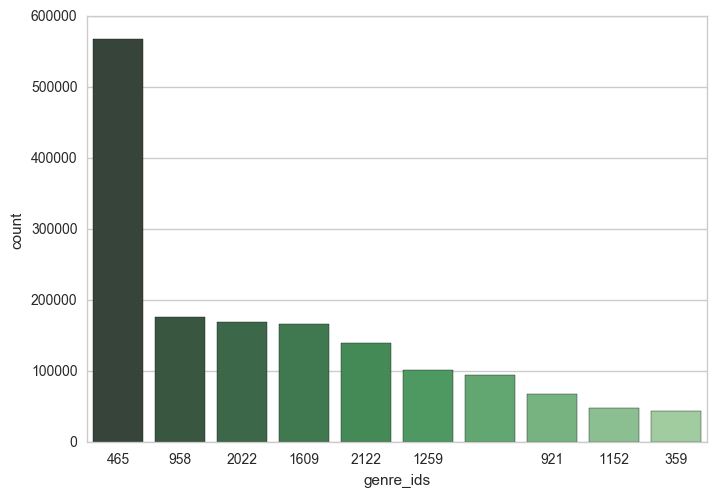

In [273]:
get_variable_stats(song_df, "genre_ids")

In [294]:
import sys  

reload(sys)  
# sys.setdefaultencoding('utf8')
# sys.getdefaultencoding()
# stdout = sys.stdout
# sys.stdout = stdout

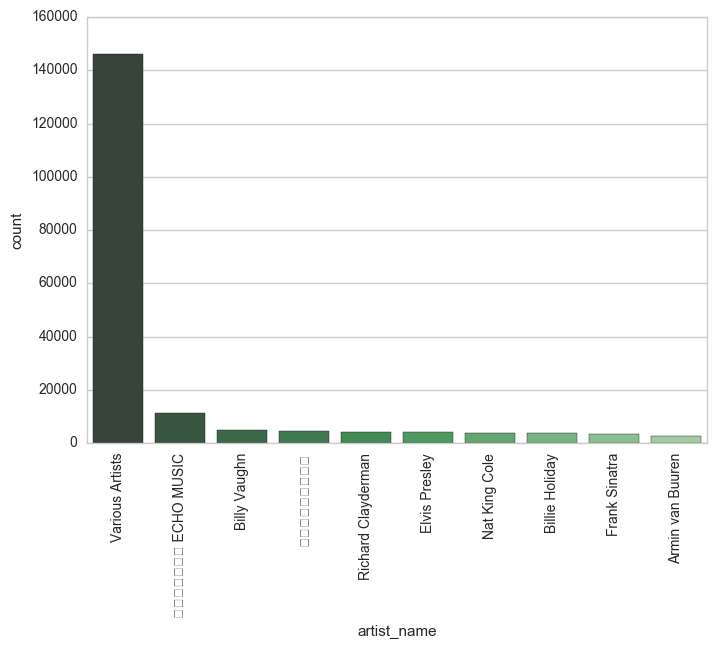

In [279]:
get_variable_stats(song_df, "artist_name")

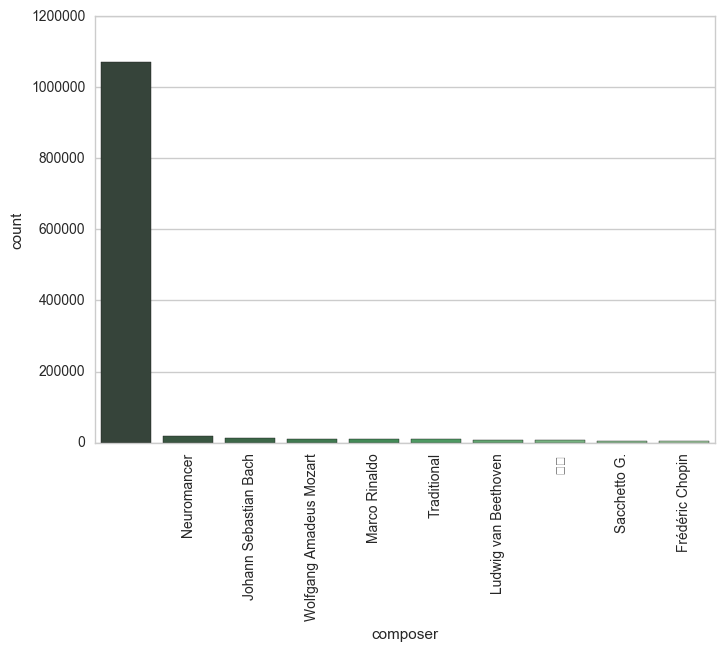

In [280]:
get_variable_stats(song_df, "composer")

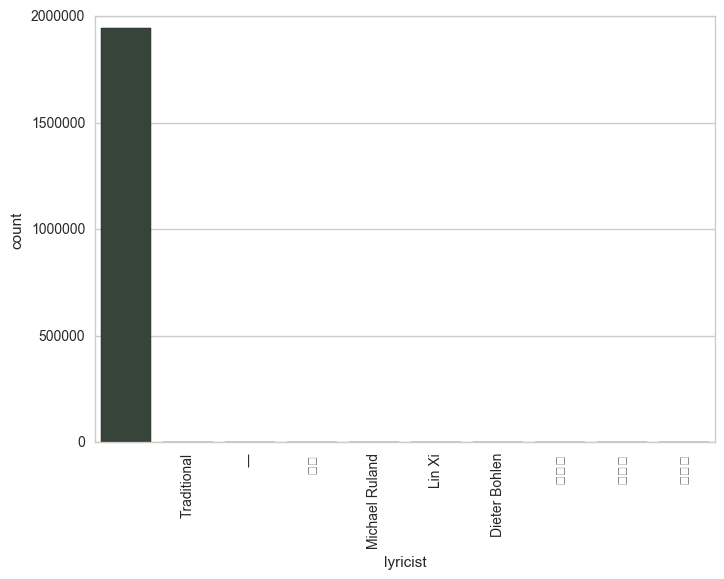

In [281]:
get_variable_stats(song_df, "lyricist")

In [283]:
song_df["lyricist"].value_counts().iloc[:10]

                  1945243
Traditional          1751
―                    1530
林夕                   1015
Michael Ruland        832
Lin Xi                671
Dieter Bohlen         660
李岩修                   633
黃偉文                   626
姚若龍                   529
Name: lyricist, dtype: int64